# Pre-processing exercise

In this exercise you will pre-process the [California housing dataset](https://www.kaggle.com/camnugent/california-housing-prices). 


The pre-processing needs to have the next parts: 
- [ ] Basic inspection of the data. 
- [ ] Dealing with missing values (you can choose what to do with them in each case). 
- [ ] Finding outliers and decide what to do with them. 
- [ ] Extract new variables. 
- [ ] Transform all categorical variables into one-hot-encoding variables. 
- [ ] Transform the numerical variables; you can use MinMax, Standarization, boxcox or any other transformation that makes sense. 


In [23]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.precision", 3)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

[Given] Basic inspection of the data.

In [24]:
housing = pd.read_csv("housing.csv", header=0, delimiter=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.301,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,NEAR BAY


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

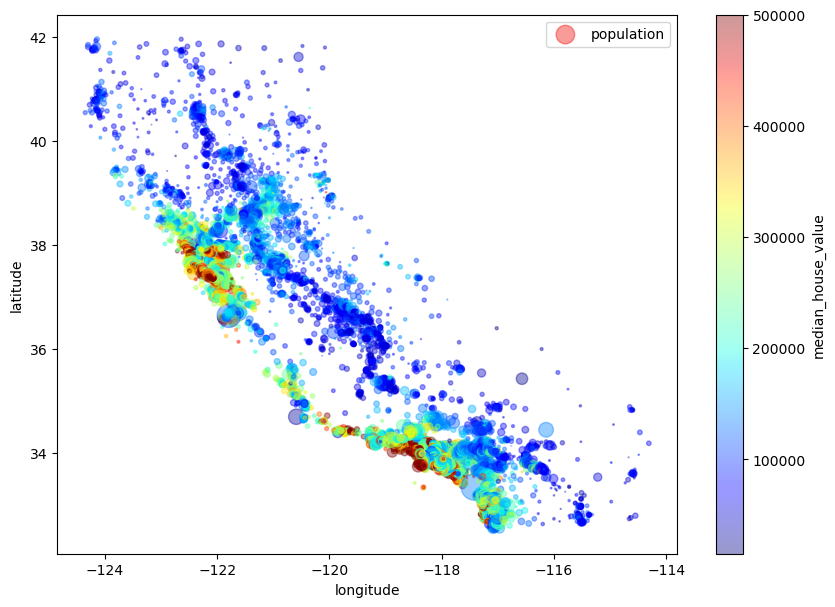

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [27]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
subset_of_housing = housing.drop(columns=['total_bedrooms','ocean_proximity'])

In [29]:
subset_of_housing.shape
housing.shape

(20640, 8)

(20640, 10)

In [30]:
rows_not_missing = housing.total_bedrooms.notna()
rows_missing = housing.total_bedrooms.isna()
rows_not_missing.sum()
rows_missing.sum()

20433

207

In [31]:
housing_without_missings = subset_of_housing[rows_not_missing]
housing_without_missings.shape

(20433, 8)

[Given] Dealing with missing values (you can choose what to do with them in each case).

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(housing_without_missings, housing.total_bedrooms[rows_not_missing])
imputed_values = knn.predict(subset_of_housing[rows_missing]);
imputed_values[:10]

KNeighborsClassifier(n_neighbors=1)

array([ 268.,  283., 1081.,  203.,  202.,  583.,  831., 1106.,  561.,
        632.])

In [33]:
housing.total_bedrooms[rows_missing] = imputed_values

/tmp/ipykernel_62176/1265557095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.total_bedrooms[rows_missing] = imputed_values


In [34]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<AxesSubplot:>

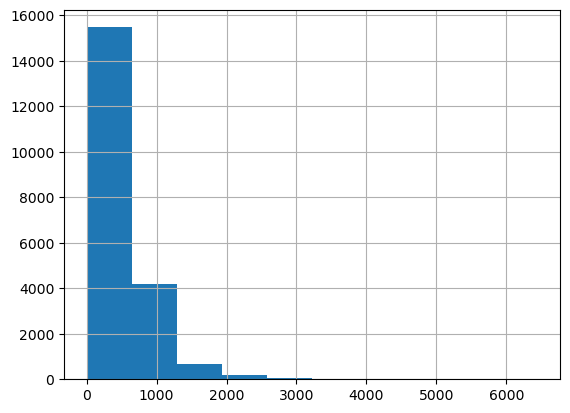

In [35]:
housing.total_bedrooms.hist()

[X] Finding outliers and decide what to do with them.

Not for all rows this analysis makes sense. For example, for longitude and latitude. For these variables, we can see that there are some outliers, but they are not errors. They are just the coordinates of the houses. So, we will not remove them.

It makes sense for the median_income variable. We can see that there are some outliers. We will remove them.

count    20640.000
mean         3.871
std          1.900
min          0.500
25%          2.563
50%          3.535
75%          4.743
max         15.000
Name: median_income, dtype: float64

(array([2909., 8446., 5756., 2294.,  740.,  224.,  151.,   52.,   68.]),
 array([ 0.4999    ,  2.11103333,  3.72216667,  5.3333    ,  6.94443333,
         8.55556667, 10.1667    , 11.77783333, 13.38896667, 15.0001    ]),
 <BarContainer object of 9 artists>)

Number of outliers removed:  681


(array([2909., 8446., 5756., 2294.,  554.,    0.,    0.,    0.,    0.]),
 array([ 0.4999    ,  2.11103333,  3.72216667,  5.3333    ,  6.94443333,
         8.55556667, 10.1667    , 11.77783333, 13.38896667, 15.0001    ]),
 <BarContainer object of 9 artists>)

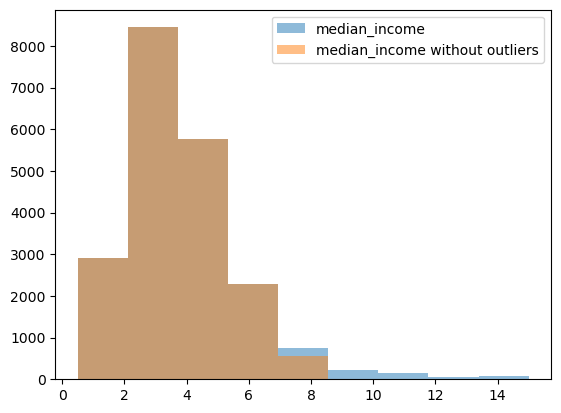

In [45]:
# Detect outliers in the median_income column using the IQR method and remove them
# from the dataset. 

# Statistics of the median_income column
housing.median_income.describe()
min = housing.median_income.min()
max = housing.median_income.max()

# Calculate the IQR
Q1 = housing.median_income.quantile(0.25)
Q3 = housing.median_income.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot the histogram of the median_income column, with 10 bins between the min and max values
bins = np.linspace(min, max, 10)
plt.hist(housing.median_income, bins=bins, alpha=0.5, label='median_income')

# Remove the outliers
housing2 = housing[(housing.median_income > lower_bound) & (housing.median_income < upper_bound)]

# How many outliers were removed?
print('Number of outliers removed: ', housing.shape[0] - housing2.shape[0])

# Plot the histogram of the median_income column again, with the same bins as before
plt.hist(housing2.median_income, bins=bins, alpha=0.5, label='median_income without outliers')

# Legend
plt.legend(['median_income', 'median_income without outliers'])

We can do the same for the median_house_value variable. We can see that there are some outliers. We will remove them.

(array([1227., 4151., 4707., 3673., 2542., 1374.,  983.,  488.,  814.]),
 array([ 14999.        ,  68888.11111111, 122777.22222222, 176666.33333333,
        230555.44444444, 284444.55555556, 338333.66666667, 392222.77777778,
        446111.88888889, 500001.        ]),
 <BarContainer object of 9 artists>)

Number of outliers removed:  722


(array([1227., 4151., 4707., 3673., 2542., 1374.,  983.,  488.,   92.]),
 array([ 14999.        ,  68888.11111111, 122777.22222222, 176666.33333333,
        230555.44444444, 284444.55555556, 338333.66666667, 392222.77777778,
        446111.88888889, 500001.        ]),
 <BarContainer object of 9 artists>)

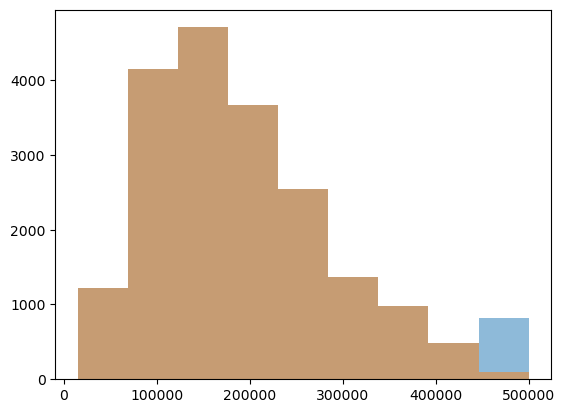

In [46]:
min = housing2.median_house_value.min()
max = housing2.median_house_value.max()

# Calculate the IQR
Q1 = housing2.median_house_value.quantile(0.25)
Q3 = housing2.median_house_value.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot the histogram of the median_house_value column, with 10 bins between the min and max values
bins = np.linspace(min, max, 10)
plt.hist(housing2.median_house_value, bins=bins, alpha=0.5, label='median_house_value')

# Remove the outliers
housing3 = housing2[(housing2.median_house_value > lower_bound) & (housing2.median_house_value < upper_bound)]

# How many outliers were removed?
print('Number of outliers removed: ', housing2.shape[0] - housing3.shape[0])

# Plot the histogram of the median_house_value column again, with the same bins as before
plt.hist(housing3.median_house_value, bins=bins, alpha=0.5, label='median_house_value without outliers')

[X] Extract new variables.

We can define the number of rooms_person variable. It is the totalRooms divided by the population.

/tmp/ipykernel_62176/3992955203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing3['rooms_per_person'] = housing3['total_rooms'] / housing3['population']


count    19237.000
mean         1.926
std          1.103
min          0.009
25%          1.487
50%          1.900
75%          2.231
max         55.222
Name: rooms_per_person, dtype: float64

(array([1.9131e+04, 7.8000e+01, 1.7000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([8.57551215e-03, 6.14342515e+00, 1.22782748e+01, 1.84131244e+01,
        2.45479740e+01, 3.06828237e+01, 3.68176733e+01, 4.29525230e+01,
        4.90873726e+01, 5.52222222e+01]),
 <BarContainer object of 9 artists>)

Number of outliers removed:  399


(array([18838.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.]),
 array([8.57551215e-03, 6.14342515e+00, 1.22782748e+01, 1.84131244e+01,
        2.45479740e+01, 3.06828237e+01, 3.68176733e+01, 4.29525230e+01,
        4.90873726e+01, 5.52222222e+01]),
 <BarContainer object of 9 artists>)

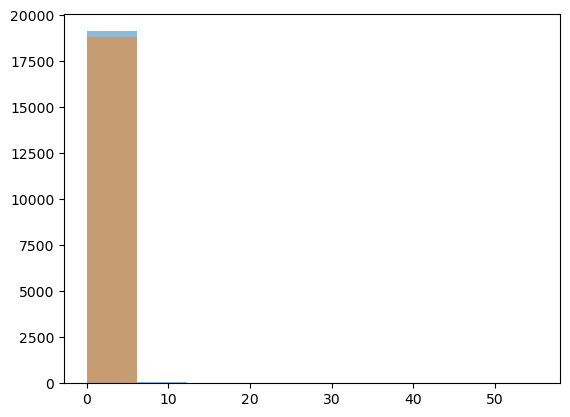

In [49]:
housing3['rooms_per_person'] = housing3['total_rooms'] / housing3['population']
housing3['rooms_per_person'].describe()

# It makes sense to remove outliers of this column as well. We can see houses with almost 0 rooms per person, as well as houses with more than 50 rooms per person.
min = housing3.rooms_per_person.min()
max = housing3.rooms_per_person.max()

# Calculate the IQR
Q1 = housing3.rooms_per_person.quantile(0.25)
Q3 = housing3.rooms_per_person.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Plot the histogram of the rooms_per_person column, with 10 bins between the min and max values
bins = np.linspace(min, max, 10)
plt.hist(housing3.rooms_per_person, bins=bins, alpha=0.5, label='rooms_per_person')

# Remove the outliers
housing4 = housing3[(housing3.rooms_per_person > lower_bound) & (housing3.rooms_per_person < upper_bound)]

# How many outliers were removed?
print('Number of outliers removed: ', housing3.shape[0] - housing4.shape[0])

# Plot the histogram of the rooms_per_person column again, with the same bins as before
plt.hist(housing4.rooms_per_person, bins=bins, alpha=0.5, label='rooms_per_person without outliers')

[X] Transform all categorical variables into one-hot-encoding variables.

In [51]:
# The only categorical variable is ocean_proximity. We can use one-hot encoding to convert it to numerical values.
housing4 = pd.get_dummies(housing4, columns=['ocean_proximity'])
housing4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,2.958,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,2.283,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,2.880,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.037,269700.0,2.225,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.659,299200.0,2.317,0,0,0,1,0


[X] Transform the numerical variables; you can use MinMax, Standarization, boxcox or any other transformation that makes sense.

Let's go with MinMax transformation.

In [52]:
# Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
housing5 = pd.DataFrame(scaler.fit_transform(housing4), columns=housing4.columns)
housing5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.215,0.564,1.0,0.037,0.029,0.014,0.029,0.900,0.762,0.870,0.0,0.0,0.0,1.0,0.0
1,0.214,0.564,1.0,0.032,0.036,0.015,0.036,0.685,0.738,0.643,0.0,0.0,0.0,1.0,0.0
2,0.214,0.564,1.0,0.041,0.043,0.016,0.042,0.445,0.740,0.843,0.0,0.0,0.0,1.0,0.0
3,0.214,0.564,1.0,0.023,0.033,0.011,0.031,0.471,0.576,0.623,0.0,0.0,0.0,1.0,0.0
4,0.214,0.563,1.0,0.064,0.076,0.030,0.084,0.421,0.643,0.654,0.0,0.0,0.0,1.0,0.0
